In [3]:
#Import the necessary module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.svm import SVC
import seaborn as sns

In [4]:
data=pd.read_csv('airbnb.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/18,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/19,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/19,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/18,0.10,1,0


In [5]:
#fill missing data with mean strategy
data[data==' ']=np.nan
#print the number of NaNs
print(data.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


Text(0.5, 1.0, 'Room Type')

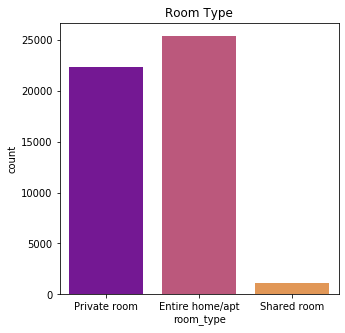

In [6]:
sns.countplot(data['room_type'],palette='plasma')
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.title('Room Type')

In [7]:
data.drop(['id','name','host_id','latitude','longitude','neighbourhood',
           'latitude','longitude','number_of_reviews'], axis=1, inplace=True)
#examing the changes
data.head(5)

,host_name,neighbourhood_group,room_type,price,minimum_nights,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,John,Brooklyn,Private room,149,1,10/19/18,0.21,6,365
1,Jennifer,Manhattan,Entire home/apt,225,1,5/21/19,0.38,2,355
2,Elisabeth,Manhattan,Private room,150,3,NaN,NaN,1,365
3,LisaRoxanne,Brooklyn,Entire home/apt,89,1,7/5/19,4.64,1,194
4,Laura,Manhattan,Entire home/apt,80,10,11/19/18,0.10,1,0


In [8]:
data.drop(['last_review','reviews_per_month','host_name'], axis=1, inplace=True)
data

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,149,1,6,365
1,Manhattan,Entire home/apt,225,1,2,355
2,Manhattan,Private room,150,3,1,365
3,Brooklyn,Entire home/apt,89,1,1,194
4,Manhattan,Entire home/apt,80,10,1,0
5,Manhattan,Entire home/apt,200,3,1,129
6,Brooklyn,Private room,60,45,1,0
7,Manhattan,Private room,79,2,1,220
8,Manhattan,Private room,79,2,1,0
9,Manhattan,Entire home/apt,150,1,4,188


In [12]:
data.head(20)

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,149,1,6,365
1,Manhattan,Entire home/apt,225,1,2,355
2,Manhattan,Private room,150,3,1,365
3,Brooklyn,Entire home/apt,89,1,1,194
4,Manhattan,Entire home/apt,80,10,1,0
5,Manhattan,Entire home/apt,200,3,1,129
6,Brooklyn,Private room,60,45,1,0
7,Manhattan,Private room,79,2,1,220
8,Manhattan,Private room,79,2,1,0
9,Manhattan,Entire home/apt,150,1,4,188


In [9]:
#encode the input
def Encode(data):
    for column in data.columns[data.columns.isin(['neighbourhood_group','room_type'])]:
        data[column]=data[column].factorize()[0]
    return data
data_en=Encode(data.copy())
data_en.head()

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,0,0,149,1,6,365
1,1,1,225,1,2,355
2,1,0,150,3,1,365
3,0,1,89,1,1,194
4,1,1,80,10,1,0


In [10]:
from numpy.random import seed

### Question 1: Bootstrap sampling to estimate the same 95% confidence interval lower limit.

In [11]:
np.random.seed(47)
N_rep=10000
mean_replicate=np.empty(N_rep)
for i in range(N_rep):
    samples=np.random.choice(data_en['price'], len(data_en['price']))
    mean_replicate[i]=np.mean(samples)
mean, std=np.mean(mean_replicate), np.std(mean_replicate)
lower_bound=mean-1.64*std
print(lower_bound)

150.95973740986193


#### If I performed 10000 replicates immediately after setting the random seed to 47, the lower limit value for price is $150.95.

### Question 2: Perform a bootstrapped hypothesis test at the 5% significance level ($\alpha = 0.05$) to calculate the p-value of the price difference between private room and entire home/apartment, state your null and alternative hypotheses and whether you retain or reject the null hypothesis for the given significance level.

In [12]:
private_room=data_en.price[data_en.room_type==0]
entire_room=data_en.price[data_en.room_type==1]
private_number=len(private_room)
entire_number=len(entire_room)

In [13]:
mean_diff_observe=np.mean(private_room)-np.mean(entire_room)
print(mean_diff_observe)

-122.01327327650093


#### The mean price difference between private room and entire room is $-122.

In [14]:
np.random.seed(47)
std_diff_replicate=np.empty(N_rep)
for i in range(N_rep):
    private_samples=np.random.choice(private_room, private_number)
    entire_samples=np.random.choice(entire_room, entire_number)
    std_diff_replicate[i]=np.std(private_samples)-np.std(entire_samples)
std_diff_mean, std_diff_std=np.mean(std_diff_replicate), np.std(std_diff_replicate)
conf_interval=[std_diff_mean-1.96*std_diff_std,std_diff_mean+1.96*std_diff_std]
print(conf_interval)

[-180.63805587453064, -68.30181568294174]


#### 95% confidence interval for the difference between the private room and entire room/apt is [-180,-68].

In [15]:
np.random.seed(47)
entire_shifted=entire_room-np.mean(entire_room)+np.mean(private_room)
def permutation_sample(data1, data2):
    data3=np.random.permutation(np.concatenate((data1,data2)))
    perm_sample_1=data3[:len(data1)]
    perm_sample_2=data3[len(data1):]
    return perm_sample_1, perm_sample_2
perm_mean_replicates=np.empty(N_rep)
for i in range(N_rep):
    perm_private, perm_entire=permutation_sample(private_room, entire_shifted)
    perm_mean_replicates[i]=np.mean(perm_private)-np.mean(perm_entire)
mean_diff=np.empty(N_rep)
for i in range(N_rep):
    mean_diff[i]=np.mean(private_samples)-np.mean(np.random.choice(entire_shifted, len(entire_shifted)))

In [16]:
p_value_permutation=np.sum(perm_mean_replicates>=mean_diff_observe)/len(perm_mean_replicates)
print('p_val_permuation is %s' % p_value_permutation)

p_val_permuation is 1.0


In [17]:
p_val=(np.sum(mean_diff)>=mean_diff_observe)/len(mean_diff)
print('p value is %s'% p_val)

p value is 0.0


#### Based on the p value 0.0, we can predict the price between entire home/apt and private room has signifant difference.

### End